<a href="https://colab.research.google.com/github/naokityokoyama/Machine_Learning/blob/master/Kmeans_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install biokit

In [80]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from biokit.viz import corrplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [108]:
df = pd.read_csv('/content/Wine.csv')

In [109]:
df.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [110]:
df = df.rename(columns={'Alcohol': 'Alcool', 
                       'Ash' : 'Po',
                        'Ash_Alcanity'	: 'Alcalinidade_po',
                        'Magnesium': 'Magnesio' ,
                        'Color_Intensity': 'intensidade_cor'})

In [111]:
df.head(1)


,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,intensidade_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1


In [112]:
df.describe(include='all')

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,intensidade_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [113]:
matriz_corr = df.corr()
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,intensidade_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
intensidade_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


/usr/local/lib/python3.6/dist-packages/biokit/viz/corrplot.py:335: MatplotlibDeprecationWarning:


The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.



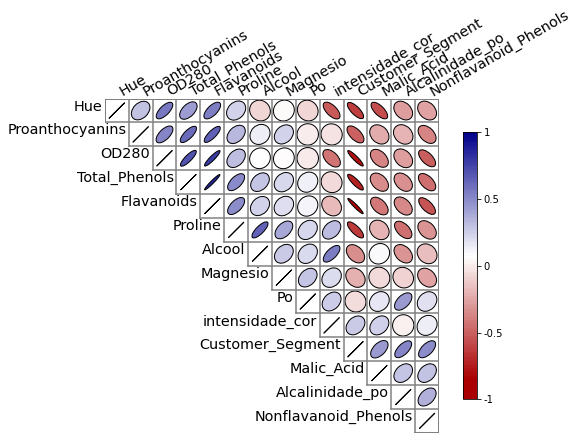

In [114]:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper='ellipse', fontsize= 'x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)

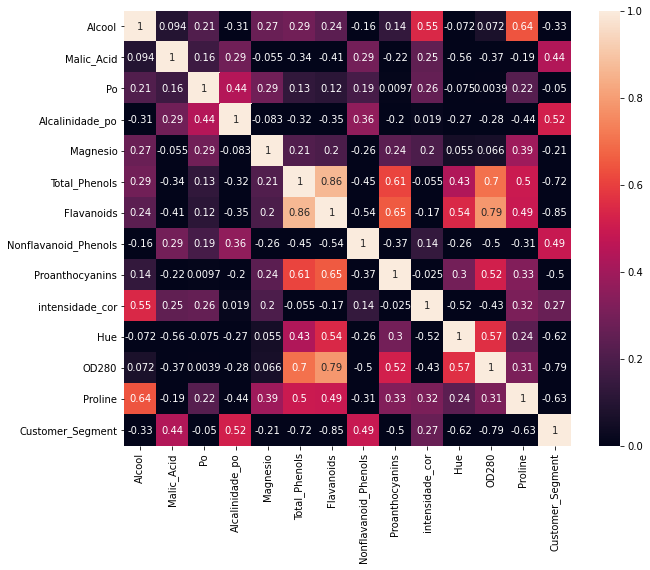

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, vmin=0, vmax=1, annot=True)

## Normalizar os dados

In [116]:
minmax = MinMaxScaler()
mimmax_transform = minmax.fit_transform(df)
df_novo =  pd.DataFrame(columns=[df.columns], data=mimmax_transform)

In [121]:
df_novo.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,intensidade_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


## Kmeans

In [122]:
cluster = KMeans(n_clusters=4)
cluster.fit(df_novo)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [123]:
labels = cluster.labels_
print (labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [139]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (Alcool,)                178 non-null    float64
 1   (Malic_Acid,)            178 non-null    float64
 2   (Po,)                    178 non-null    float64
 3   (Alcalinidade_po,)       178 non-null    float64
 4   (Magnesio,)              178 non-null    float64
 5   (Total_Phenols,)         178 non-null    float64
 6   (Flavanoids,)            178 non-null    float64
 7   (Nonflavanoid_Phenols,)  178 non-null    float64
 8   (Proanthocyanins,)       178 non-null    float64
 9   (intensidade_cor,)       178 non-null    float64
 10  (Hue,)                   178 non-null    float64
 11  (OD280,)                 178 non-null    float64
 12  (Proline,)               178 non-null    float64
 13  (Customer_Segment,)      178 non-null    float64
dtypes: float64(14)
memory usag

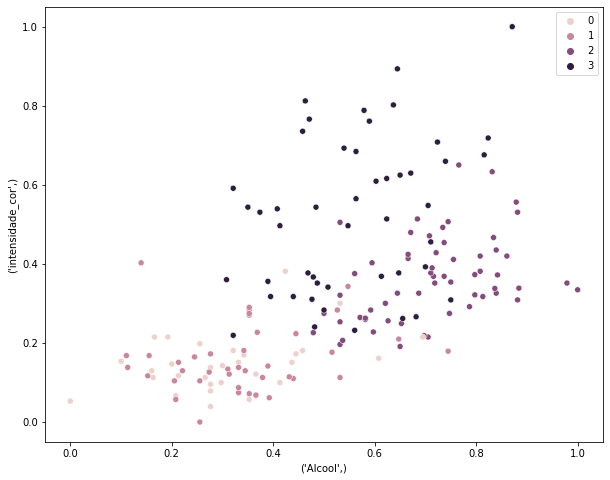

In [142]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_novo, x=df_novo.iloc[:,0], y=df_novo.iloc[:,9], hue=labels)

## Kmeans = 3

In [144]:
cluster = KMeans(n_clusters=3)
cluster.fit(df_novo)
labels = cluster.labels_
print (labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


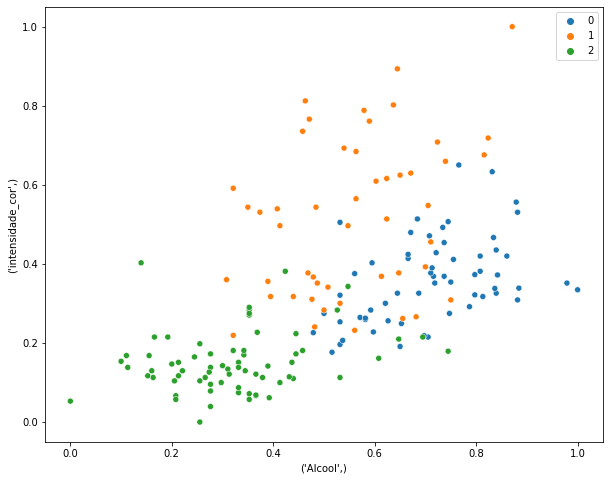

In [150]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_novo, x=df_novo.iloc[:,0], y=df_novo.iloc[:,9], hue=labels, palette="tab10")

## Grafico pelo plotly

In [163]:
#2d df original
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['intensidade_cor'],
                        y= df['Alcool'],
                        mode = 'markers', 
                        marker = dict(color = labels.astype(np.float))))

In [165]:
#3d df original
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['intensidade_cor'],
                        y= df['Alcool'],
                        z= df['Proline'],
                        mode = 'markers', 
                        text=labels, #ao passar o mouse diz qual o grupo pertencente 
                        marker = dict(color = labels.astype(np.float))))

In [166]:
#Labels no grafico

fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de cor',
    yaxis_title = 'Alcool',
    zaxis_title = 'Proline',
))
fig.show()

In [176]:
#centroides
centroide = pd.DataFrame(cluster.cluster_centers_, columns=df.columns)


,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,intensidade_cor,Hue,OD280,Proline,Customer_Segment
0,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
1,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [185]:
#grafico do DF_novo
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_novo.iloc[:,9],
                        y= df_novo.iloc[:,0],
                        z= df_novo.iloc[:,12],
                        mode = 'markers', 
                        text=labels, #ao passar o mouse diz qual o grupo pertencente 
                        marker = dict(color = labels.astype(np.float))))

In [186]:
#centroide
fig.add_trace(go.Scatter3d(x=centroide['intensidade_cor'],
                        y= centroide['Alcool'],
                        z= centroide['Proline'],
                        mode = 'markers', 
                        text=labels, 
                        marker = dict(color = 'red')))
fig.show()